In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [5]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


let's check for any missing data

In [34]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [4]:
df = df.dropna(axis=0)

In [36]:
df.isnull().sum()

label     0
review    0
dtype: int64

Let's check if there are any reviews where it is not a NaN but '' or "" and remove them

In [5]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [6]:
index = df[df['review'].str.isspace()].index

In [7]:
df = df.drop(index=index, axis=0)

In [8]:
df[df['review'].str.isspace()]

,label,review


Let's look at the top 20 words for positive and negative reviews

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer(stop_words='english')

getting only positive reviews

In [43]:
df[df['label'] == 'pos']['review']

2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
11      with stars like sigourney weaver ( " alien " t...
16      i remember hearing about this film when it fir...
18      garry shandling makes his long overdue starrin...
                              ...                        
1995    i like movies with albert brooks , and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict : spine-chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago , when i first download...
Name: review, Length: 969, dtype: object

getting only negative reviews

In [44]:
df[df['label'] == 'neg']['review']

0       how do films like mouse hunt get into theatres...
1       some talented actresses are blessed with a dem...
4       my first press screening of 1998 and already i...
5       to put it bluntly , ed wood would have been pr...
6       synopsis : melissa , a mentally-disturbed woma...
                              ...                        
1985    the real blonde ( r ) a woman's face , an arm ...
1986     * * * the following review contains spoilers ...
1987     " book " should have remained in shadows \r\n...
1991    all right , all right , we get the point : des...
1992    say , tell me if you've seen this before : a c...
Name: review, Length: 969, dtype: object

In [45]:
matrix = cv.fit_transform(df[df['label'] == 'pos']['review'])

In [46]:
# cv.get_feature_names()

In [47]:
freq = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])

top 20 words in positive reviews

In [48]:
print(sorted(freq, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [49]:
matrix = cv.fit_transform(df[df['label'] == 'neg']['review'])

In [50]:
freq = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])

top 20 words in negative reviews

In [51]:
print(sorted(freq, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df['review']
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [66]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [21]:
param_grid = {'clf__C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
             'clf__kernel': ['linear', 'rbf'],
             'clf__gamma': ['scale', 'auto']}

In [22]:
def run_model(model, param_grid, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', model)
    ])
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=12)
    grid.fit(X_train, y_train)
    grid.best_estimator_.get_params()
    
    dict = grid.best_estimator_.get_params()
    for k, v in dict.items():
        print(f"{k:{30}} {v}")
    print('\n')
    
    preds = grid.predict(X_test)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(grid, X_test, y_test)

In [23]:
model = SVC()

memory                         None
steps                          [('tfidf', TfidfVectorizer()), ('clf', SVC(C=1, kernel='linear'))]
verbose                        False
tfidf                          TfidfVectorizer()
clf                            SVC(C=1, kernel='linear')
tfidf__analyzer                word
tfidf__binary                  False
tfidf__decode_error            strict
tfidf__dtype                   <class 'numpy.float64'>
tfidf__encoding                utf-8
tfidf__input                   content
tfidf__lowercase               True
tfidf__max_df                  1.0
tfidf__max_features            None
tfidf__min_df                  1
tfidf__ngram_range             (1, 1)
tfidf__norm                    l2
tfidf__preprocessor            None
tfidf__smooth_idf              True
tfidf__stop_words              None
tfidf__strip_accents           None
tfidf__sublinear_tf            False
tfidf__token_pattern           (?u)\b\w\w+\b
tfidf__tokenizer               None
tfidf__

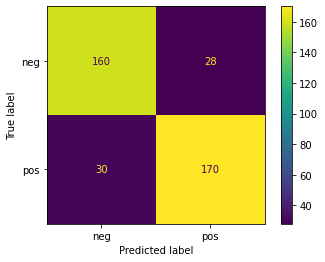

In [24]:
run_model(model, param_grid, X_train, X_test, y_train, y_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [27]:
param_grid = {'clf__penalty': ['l1', 'l2', 'elasticnet'],
             'clf__C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
              'clf__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
             'clf__solver': ['saga'],
             'clf__max_iter': [1000]}

In [28]:
model = LogisticRegression()

memory                         None
steps                          [('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(C=10, l1_ratio=0.1, max_iter=1000, penalty='elasticnet',
                   solver='saga'))]
verbose                        False
tfidf                          TfidfVectorizer()
clf                            LogisticRegression(C=10, l1_ratio=0.1, max_iter=1000, penalty='elasticnet',
                   solver='saga')
tfidf__analyzer                word
tfidf__binary                  False
tfidf__decode_error            strict
tfidf__dtype                   <class 'numpy.float64'>
tfidf__encoding                utf-8
tfidf__input                   content
tfidf__lowercase               True
tfidf__max_df                  1.0
tfidf__max_features            None
tfidf__min_df                  1
tfidf__ngram_range             (1, 1)
tfidf__norm                    l2
tfidf__preprocessor            None
tfidf__smooth_idf              True
tfidf__stop_words            

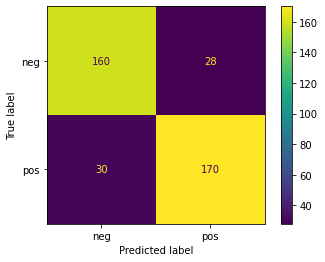

In [29]:
run_model(model, param_grid, X_train, X_test, y_train, y_test)

In [30]:
# changing the threshold value
# grid.predict_proba(X_test)
# preds_var_thresh = (grid.predict_proba(X_test)[:,0]>=0.55).astype(int)
# y_test_map = y_test.map({'pos': 0, 'neg':1})
# print(classification_report(y_test_map, preds_var_thresh))

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier()

In [33]:
param_grid = {'clf__n_estimators': [100, 200, 300, 400, 500],
             'clf__max_depth': [4,6,8, 10, 12, 16, 20],
             'clf__max_features': ['auto', 'log2'],
             'clf__bootstrap': ['True', 'False'],
             'clf__criterion': ['gini', 'entropy']}

memory                         None
steps                          [('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=20,
                       n_estimators=500))]
verbose                        False
tfidf                          TfidfVectorizer()
clf                            RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=20,
                       n_estimators=500)
tfidf__analyzer                word
tfidf__binary                  False
tfidf__decode_error            strict
tfidf__dtype                   <class 'numpy.float64'>
tfidf__encoding                utf-8
tfidf__input                   content
tfidf__lowercase               True
tfidf__max_df                  1.0
tfidf__max_features            None
tfidf__min_df                  1
tfidf__ngram_range             (1, 1)
tfidf__norm                    l2
tfidf__preprocessor            None
tfidf__smooth_idf              True
tfidf__stop_wor

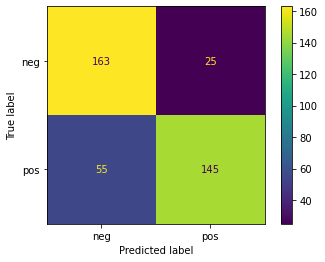

In [34]:
run_model(model, param_grid, X_train, X_test, y_train, y_test)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
model = MultinomialNB()

In [39]:
param_grid = {'clf__alpha': np.logspace(0,-9,20)}

memory                         None
steps                          [('tfidf', TfidfVectorizer()), ('clf', MultinomialNB(alpha=0.3359818286283782))]
verbose                        False
tfidf                          TfidfVectorizer()
clf                            MultinomialNB(alpha=0.3359818286283782)
tfidf__analyzer                word
tfidf__binary                  False
tfidf__decode_error            strict
tfidf__dtype                   <class 'numpy.float64'>
tfidf__encoding                utf-8
tfidf__input                   content
tfidf__lowercase               True
tfidf__max_df                  1.0
tfidf__max_features            None
tfidf__min_df                  1
tfidf__ngram_range             (1, 1)
tfidf__norm                    l2
tfidf__preprocessor            None
tfidf__smooth_idf              True
tfidf__stop_words              None
tfidf__strip_accents           None
tfidf__sublinear_tf            False
tfidf__token_pattern           (?u)\b\w\w+\b
tfidf__tokenize

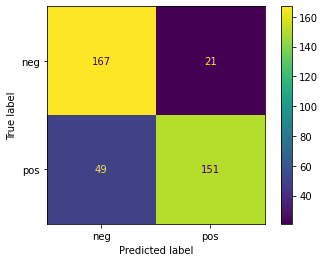

In [40]:
run_model(model, param_grid, X_train, X_test, y_train, y_test)